In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# File Import

In [2]:
df=pd.read_csv('lung_disease.csv')

In [3]:
df.head()

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,Other diseaes,AGE,Risk
0,Patient-1,T,2.85,2.16,F,F,F,T,T,X-ray,F,F,60,F
1,Patient-2,F,3.40,1.88,F,F,F,F,F,MRI,T,F,51,F
2,Patient-3,F,2.76,2.08,F,F,F,T,F,X-ray,F,F,59,F
3,Patient-4,F,3.68,3.04,F,F,F,F,F,X-ray,F,F,54,F
4,Patient-5,F,2.44,0.96,F,T,F,T,T,X-ray,F,F,73,T


In [4]:
df['smoke'].replace({'T': 1, 'F': 0},inplace=True)
df['PEFR'].replace({'F': 1, 'T': 0},inplace=True)
df['O2'].replace({'F': 1, 'T': 0},inplace=True)
df['PEFR'].replace({'F': 1, 'T': 0},inplace=True)
df[ 'ABG-P-O2'].replace({'F': 1, 'T': 0},inplace=True)
df[ 'ABG-P-CO2'].replace({'F': 1, 'T': 0},inplace=True)
df[ 'ABG-pH Level'].replace({'F': 1, 'T': 0},inplace=True)
df[ 'Scan'].replace({'MRI':1, 'X-ray':2 ,'CT':3},inplace=True)
df[ 'Asthama'].replace({'F': 0, 'T':1 },inplace=True)
df[ 'Other diseaes'].replace({'F': 0, 'T':1 },inplace=True)
df[ 'Risk'].replace({'F':0, 'T':1 },inplace=True)
df.head()

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,Other diseaes,AGE,Risk
0,Patient-1,1,2.85,2.16,1,1,1,0,0,2,0,0,60,0
1,Patient-2,0,3.40,1.88,1,1,1,1,1,1,1,0,51,0
2,Patient-3,0,2.76,2.08,1,1,1,0,1,2,0,0,59,0
3,Patient-4,0,3.68,3.04,1,1,1,1,1,2,0,0,54,0
4,Patient-5,0,2.44,0.96,1,0,1,0,0,2,0,0,73,1


# Data Labeling

In [5]:
#Input Data
x=df.iloc[:,1:-1].values

In [6]:
x

array([[ 1.  ,  2.85,  2.16, ...,  0.  ,  0.  , 60.  ],
       [ 0.  ,  3.4 ,  1.88, ...,  1.  ,  0.  , 51.  ],
       [ 0.  ,  2.76,  2.08, ...,  0.  ,  0.  , 59.  ],
       ...,
       [ 0.  ,  3.04,  2.08, ...,  0.  ,  0.  , 52.  ],
       [ 0.  ,  1.96,  1.68, ...,  0.  ,  0.  , 79.  ],
       [ 0.  ,  4.72,  3.56, ...,  0.  ,  0.  , 51.  ]])

In [7]:
# Output 
y=df.iloc[:,-1].values

In [8]:
y

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

# Training Data

In [9]:
from sklearn.model_selection import train_test_split

Train Test Split

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

Standardization

In [11]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [14]:
xtrain

array([[-0.38774947, -0.72270547, -0.22162413, ..., -0.31091264,
        -0.07820619, -0.4213687 ],
       [-0.38774947, -1.00284698, -0.23635962, ..., -0.31091264,
        -0.07820619,  0.14678828],
       [-0.38774947,  0.07102879, -0.22162413, ..., -0.31091264,
        -0.07820619,  0.14678828],
       ...,
       [-0.38774947, -0.58263472, -0.227053  , ..., -0.31091264,
        -0.07820619, -4.73936174],
       [-0.38774947,  1.05152405, -0.10606681, ..., -0.31091264,
        -0.07820619, -0.08047451],
       [-0.38774947,  0.49124104, -0.19913311, ...,  3.2163376 ,
        -0.07820619, -0.19410591]])

# Training Neural Network

In [15]:
from tensorflow.keras import layers, models

In [16]:
#initialize model
ann=Sequential()
#add layers
ann.add(Dense(units=13,activation="relu"))#Input Layer
ann.add(Dense(units=5,activation="relu")) #hidden layer
ann.add(Dense(units=1,activation="sigmoid"))#output Layer


In [17]:
ann.compile(optimizer="adam",loss="binary_crossentropy")

In [20]:
#compile
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
#train
ann.fit(xtrain,ytrain,batch_size=30,epochs=500)

Epoch 1/500
11/11 [==============================] - 0s 1ms/step - loss: 0.1610 - accuracy: 0.9331
Epoch 2/500
11/11 [==============================] - 0s 1ms/step - loss: 0.1571 - accuracy: 0.9362
Epoch 3/500
11/11 [==============================] - 0s 1ms/step - loss: 0.1564 - accuracy: 0.9392
Epoch 4/500
11/11 [==============================] - 0s 1ms/step - loss: 0.1562 - accuracy: 0.9392
Epoch 5/500
11/11 [==============================] - 0s 1ms/step - loss: 0.1556 - accuracy: 0.9392
Epoch 6/500
11/11 [==============================] - 0s 1ms/step - loss: 0.1557 - accuracy: 0.9392
Epoch 7/500
11/11 [==============================] - 0s 999us/step - loss: 0.1561 - accuracy: 0.9392
Epoch 8/500
11/11 [==============================] - 0s 1ms/step - loss: 0.1559 - accuracy: 0.9422
Epoch 9/500
11/11 [==============================] - 0s 997us/step - loss: 0.1554 - accuracy: 0.9422
Epoch 10/500
11/11 [==============================] - 0s 1ms/step - loss: 0.1556 - accuracy: 0.9392
Epoch

In [21]:
ann.history.history

{'loss': [0.16102954745292664,
  0.15705008804798126,
  0.1564093381166458,
  0.15620006620883942,
  0.15563306212425232,
  0.15569865703582764,
  0.15607516467571259,
  0.15586721897125244,
  0.15538567304611206,
  0.15556061267852783,
  0.15526767075061798,
  0.15480534732341766,
  0.15447507798671722,
  0.15442761778831482,
  0.15437521040439606,
  0.1546042263507843,
  0.15408772230148315,
  0.15416625142097473,
  0.15382006764411926,
  0.15414778888225555,
  0.15397237241268158,
  0.15350468456745148,
  0.15418203175067902,
  0.1533081978559494,
  0.1538839042186737,
  0.15332520008087158,
  0.1531592309474945,
  0.1537969708442688,
  0.1536882221698761,
  0.15390406548976898,
  0.15302056074142456,
  0.15330776572227478,
  0.1526668220758438,
  0.15229961276054382,
  0.15229392051696777,
  0.15275126695632935,
  0.15273360908031464,
  0.15176284313201904,
  0.15248264372348785,
  0.15283948183059692,
  0.15154318511486053,
  0.1520462930202484,
  0.15197382867336273,
  0.15131194

# Loss vs Accuracy Graph

<AxesSubplot:>

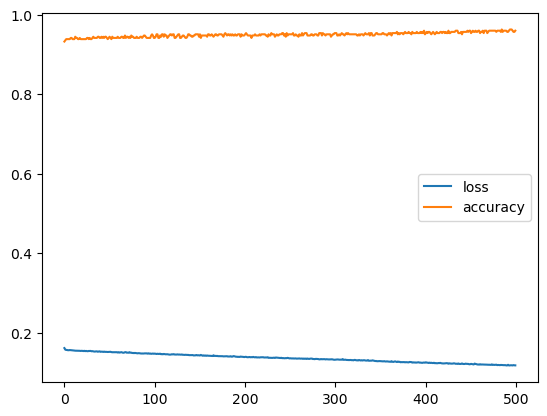

In [22]:
lossgraph=pd.DataFrame(ann.history.history)
lossgraph.plot()

In [23]:
ypred=ann.predict(xtest)
ypred

5/5 [==============================] - 0s 1ms/step


array([[3.67355417e-03],
       [6.74015433e-02],
       [6.42781524e-05],
       [1.26756337e-02],
       [4.73607302e-04],
       [3.66149923e-11],
       [4.20412835e-06],
       [1.08182356e-02],
       [6.76073775e-09],
       [8.39330927e-02],
       [1.48367003e-01],
       [6.05872658e-04],
       [1.29410559e-02],
       [2.09032491e-01],
       [1.23062283e-02],
       [2.47064903e-02],
       [1.03249999e-06],
       [7.27059171e-02],
       [1.89608578e-02],
       [1.64136663e-02],
       [5.66637926e-02],
       [3.26574955e-04],
       [7.73850729e-07],
       [4.00976365e-04],
       [7.80138944e-05],
       [9.94681895e-01],
       [2.92478263e-01],
       [7.30880499e-01],
       [1.13855791e-03],
       [4.15847207e-05],
       [6.11110171e-03],
       [1.11488160e-03],
       [1.99062738e-15],
       [6.66899627e-21],
       [4.97305036e-01],
       [8.69341718e-04],
       [1.63037047e-01],
       [2.97393370e-03],
       [3.99955570e-06],
       [3.81497651e-01],


In [52]:
ypred=ann.predict(xtest)
ypred=ypred>0.5

5/5 [==============================] - 0s 1ms/step


# Classification Report

In [25]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       117
           1       0.22      0.08      0.12        24

    accuracy                           0.79       141
   macro avg       0.53      0.51      0.50       141
weighted avg       0.73      0.79      0.75       141



# Regularization

Early Stopping

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
earlystop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=250)
#train the model
ann.fit(xtrain,ytrain,epochs=500,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/500
11/11 [==============================] - 0s 13ms/step - loss: 0.1069 - accuracy: 0.9666 - val_loss: 1.5545 - val_accuracy: 0.7872
Epoch 2/500
11/11 [==============================] - 0s 7ms/step - loss: 0.1067 - accuracy: 0.9666 - val_loss: 1.5544 - val_accuracy: 0.7801
Epoch 3/500
11/11 [==============================] - 0s 8ms/step - loss: 0.1074 - accuracy: 0.9635 - val_loss: 1.5713 - val_accuracy: 0.7872
Epoch 4/500
11/11 [==============================] - 0s 7ms/step - loss: 0.1069 - accuracy: 0.9666 - val_loss: 1.5650 - val_accuracy: 0.7872
Epoch 5/500
11/11 [==============================] - 0s 6ms/step - loss: 0.1069 - accuracy: 0.9696 - val_loss: 1.5564 - val_accuracy: 0.7872
Epoch 6/500
11/11 [==============================] - 0s 6ms/step - loss: 0.1071 - accuracy: 0.9635 - val_loss: 1.5640 - val_accuracy: 0.7872
Epoch 7/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1068 - accuracy: 0.9605 - val_loss: 1.5681 - val_accuracy: 0.7872
Epoch 8/500


Epoch 252/350
11/11 [==============================] - 0s 3ms/step - loss: 0.1297 - accuracy: 0.9574 - val_loss: 0.9054 - val_accuracy: 0.8156
Epoch 252: early stopping

<AxesSubplot:>

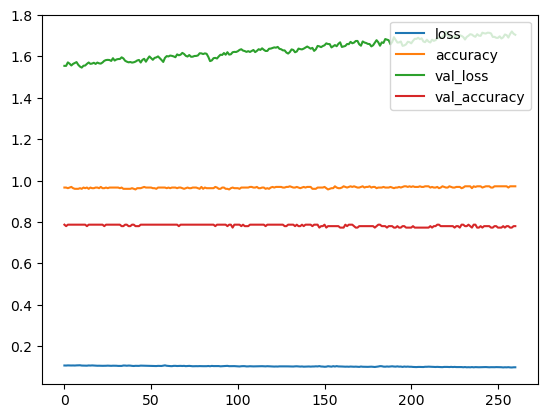

In [29]:
ES=pd.DataFrame(ann.history.history)
ES.plot()

DropOut


In [30]:
from tensorflow.keras.layers import Dropout

In [31]:
ann=Sequential()
ann.add(Dense(units=13,activation="relu"))
ann.add(Dropout(rate=0.5))
ann.add(Dense(units=5,activation="relu"))
ann.add(Dropout(rate=0.5))
ann.add(Dense(units=5,activation="relu"))
ann.add(Dropout(rate=0.5))
ann.add(Dense(units=1,activation='sigmoid'))
ann.compile(optimizer="adam",loss="binary_crossentropy")

In [32]:
earlystop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)
#train the model
ann.fit(xtrain,ytrain,epochs=350,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/350
11/11 [==============================] - 1s 13ms/step - loss: 0.6348 - val_loss: 0.6179
Epoch 2/350
11/11 [==============================] - 0s 3ms/step - loss: 0.5957 - val_loss: 0.6061
Epoch 3/350
11/11 [==============================] - 0s 3ms/step - loss: 0.5956 - val_loss: 0.5942
Epoch 4/350
11/11 [==============================] - 0s 3ms/step - loss: 0.6224 - val_loss: 0.5849
Epoch 5/350
11/11 [==============================] - 0s 3ms/step - loss: 0.6049 - val_loss: 0.5786
Epoch 6/350
11/11 [==============================] - 0s 3ms/step - loss: 0.6012 - val_loss: 0.5722
Epoch 7/350
11/11 [==============================] - 0s 3ms/step - loss: 0.5560 - val_loss: 0.5644
Epoch 8/350
11/11 [==============================] - 0s 3ms/step - loss: 0.5805 - val_loss: 0.5563
Epoch 9/350
11/11 [==============================] - 0s 3ms/step - loss: 0.5650 - val_loss: 0.5485
Epoch 10/350
11/11 [==============================] - 0s 3ms/step - loss: 0.5792 - val_loss: 0.5427
Epoch 11

<AxesSubplot:>

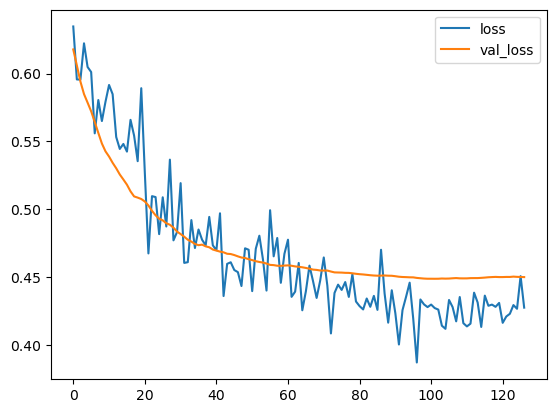

In [33]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()

In [34]:
ann.evaluate(xtrain,ytrain)

11/11 [==============================] - 0s 1ms/step - loss: 0.4021


0.40214502811431885

In [35]:
ann.evaluate(xtest,ytest)

5/5 [==============================] - 0s 1ms/step - loss: 0.4499


0.449918657541275

In [36]:
ypred=ann.predict(xtest)

5/5 [==============================] - 0s 1ms/step


# Predicting New Unknown Value

In [37]:
#unknown data prediction
newdata=[[1,2.85,2.16,1,1,1,0,0,2,0,0,60]]
newdata=sc.transform(newdata)
ann.predict(newdata)

1/1 [==============================] - 0s 15ms/step


array([[0.02422223]], dtype=float32)

# Making Model from the Neural Network

In [38]:
from tensorflow.keras.models import load_model

In [39]:
ann.save("Lungs Disease Model")

INFO:tensorflow:Assets written to: Lungs Disease Model\assets


INFO:tensorflow:Assets written to: Lungs Disease Model\assets


In [40]:
model=load_model("Lungs Disease")

In [41]:
model.predict(newdata)

1/1 [==============================] - 0s 44ms/step


array([[0.00233574]], dtype=float32)